# Problem Statement : Predict  the selling price of used car for year 2021 given the dataset

# Steps

1. Import libraries
2. Import the dataset
3. Perform Data Analysis & EDA
4. Spliting the data
5. [Optional] Data Preprocessing - Feature Scaling,...
6. Choosing a model - Decision Tree Regressor
7. Training the model
8. Testing the model
9. Checking the performance of the model

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Importing the dataset

Link: https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/car_data.csv

In [63]:
df = pd.read_csv('https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/car_data.csv')

# Data Analysis & EDA

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [5]:
df.ndim

2

In [7]:
df.shape

(4340, 8)

In [8]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [9]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [11]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [12]:
df.fuel.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [13]:
df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [14]:
df.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [15]:
df.owner.unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [23]:
# Create a column new_seller_type and place it at index of the seller_type column
# Replace the values:
# Individual - 0
# Dealer - 1
# Trustmark Dealer - 2

x = df.seller_type.replace({"Individual":0,"Dealer":1,"Trustmark Dealer":2})
df.insert(df.columns.get_loc("seller_type"),'new_seller_type',x)

In [27]:
# Create a column new_fuel and place it at index of the fuel column
# Replace the values:
# Petrol - 0
# Diesel - 1
# CNG - 2
# LPG - 3
# Electric - 4
x = df.fuel.replace({"Petrol":0,"Diesel":1,"CNG":2,"LPG":3,"Electric":4})
df.insert(df.columns.get_loc('fuel'),'new_fuel',x)

In [65]:
df['fuel'] = LabelEncoder().fit_transform(df['fuel'])
df['seller_type'] = LabelEncoder().fit_transform(df['seller_type'])
df['transmission'] = LabelEncoder().fit_transform(df['transmission'])
df['owner'] = LabelEncoder().fit_transform(df['owner'])

In [66]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2


In [67]:
# Create a column no_of_years = current year - year
df['current_year'] = 2021

In [69]:
df['no_of_years'] = df['current_year'] - df['year']

In [70]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,no_of_years
0,Maruti 800 AC,2007,60000,70000,4,1,1,0,2021,14
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0,2021,14
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0,2021,9
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0,2021,4
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2,2021,7


In [73]:
# Drop columns - name, year, cureent_year
# Rename selling_price to current_selling_price
df.drop(['name','year','current_year'],axis=1,inplace=True)
df.rename(columns={'selling_price':'current_selling_price'},inplace=True)

In [74]:
df.head()

,current_selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_years
0,60000,70000,4,1,1,0,14
1,135000,50000,4,1,1,0,14
2,600000,100000,1,1,1,0,9
3,250000,46000,4,1,1,0,4
4,450000,141000,1,1,1,2,7


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   current_selling_price  4340 non-null   int64
 1   km_driven              4340 non-null   int64
 2   fuel                   4340 non-null   int64
 3   seller_type            4340 non-null   int64
 4   transmission           4340 non-null   int64
 5   owner                  4340 non-null   int64
 6   no_of_years            4340 non-null   int64
dtypes: int64(7)
memory usage: 237.5 KB


In [76]:
df.corr()

,current_selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_years
current_selling_price,1.000000,-0.192289,-0.269653,-0.151554,-0.530205,-0.207840,-0.413922
km_driven,-0.192289,1.000000,-0.286095,0.113689,0.120226,0.297115,0.419688
fuel,-0.269653,-0.286095,1.000000,0.038797,0.039249,-0.010910,0.120002
seller_type,-0.151554,0.113689,0.038797,1.000000,0.174925,0.165681,0.098352
transmission,-0.530205,0.120226,0.039249,0.174925,1.000000,0.078893,0.143800
owner,-0.207840,0.297115,-0.010910,0.165681,0.078893,1.000000,0.414705
no_of_years,-0.413922,0.419688,0.120002,0.098352,0.143800,0.414705,1.000000


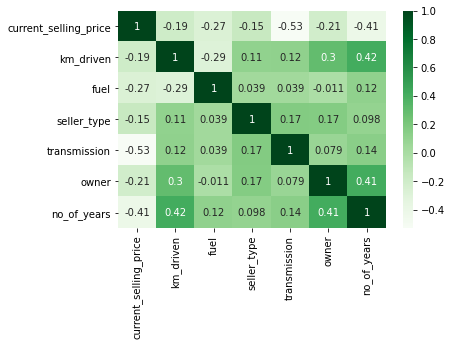

In [77]:
sns.heatmap(df.corr(), annot=True, cmap='Greens')

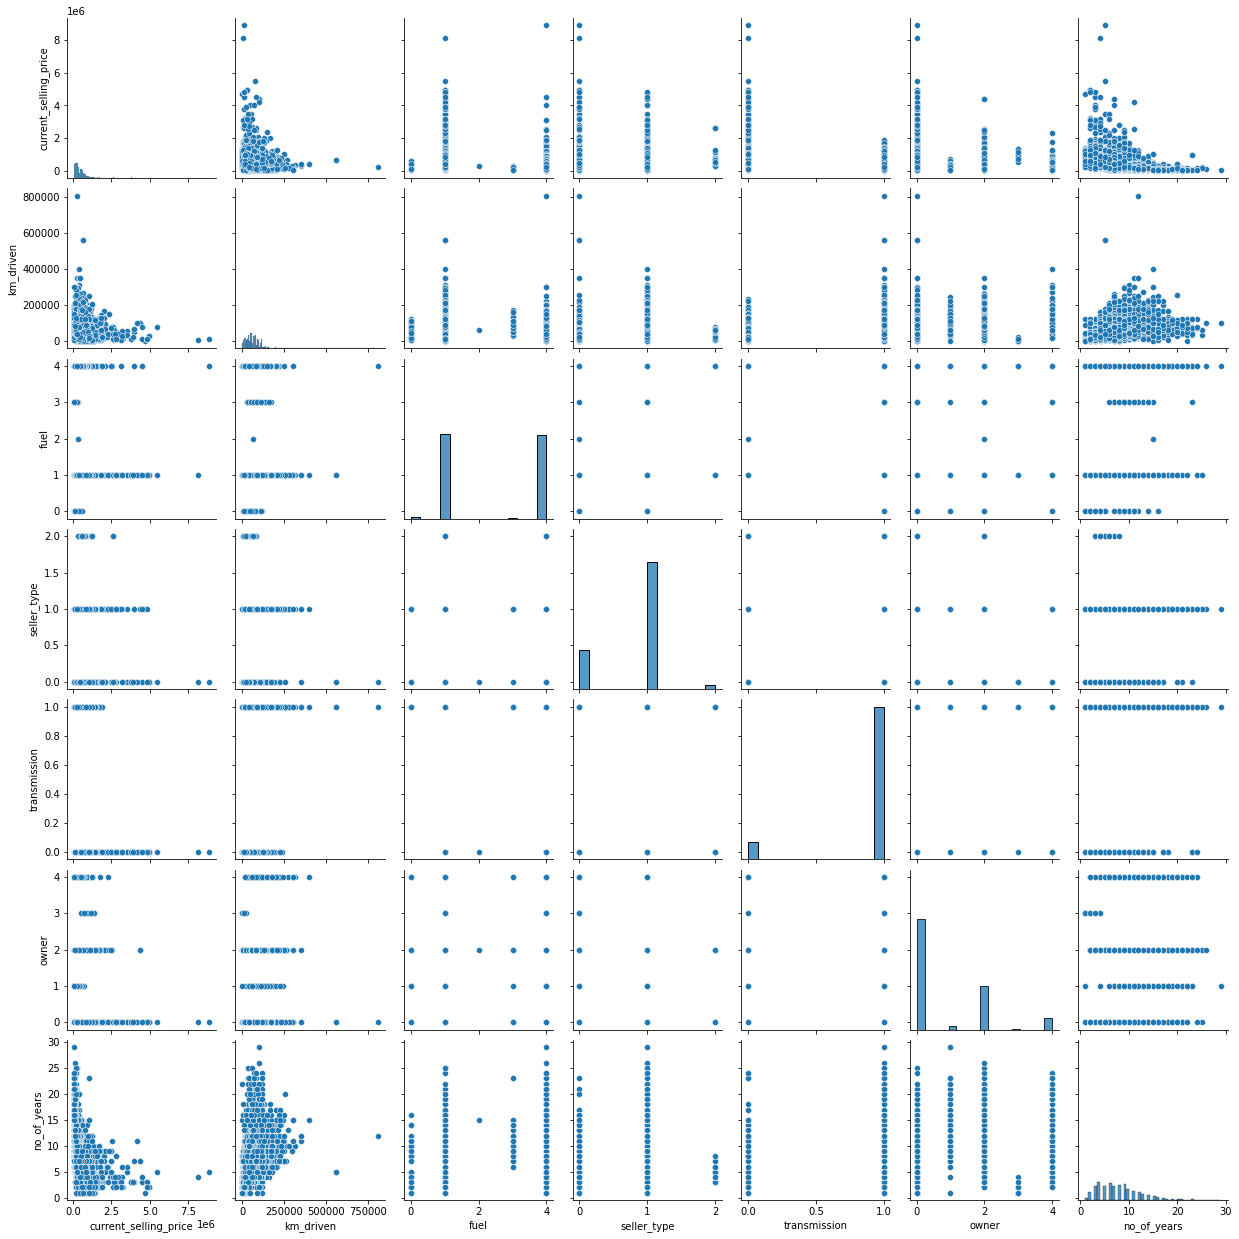

In [78]:
sns.pairplot(df)

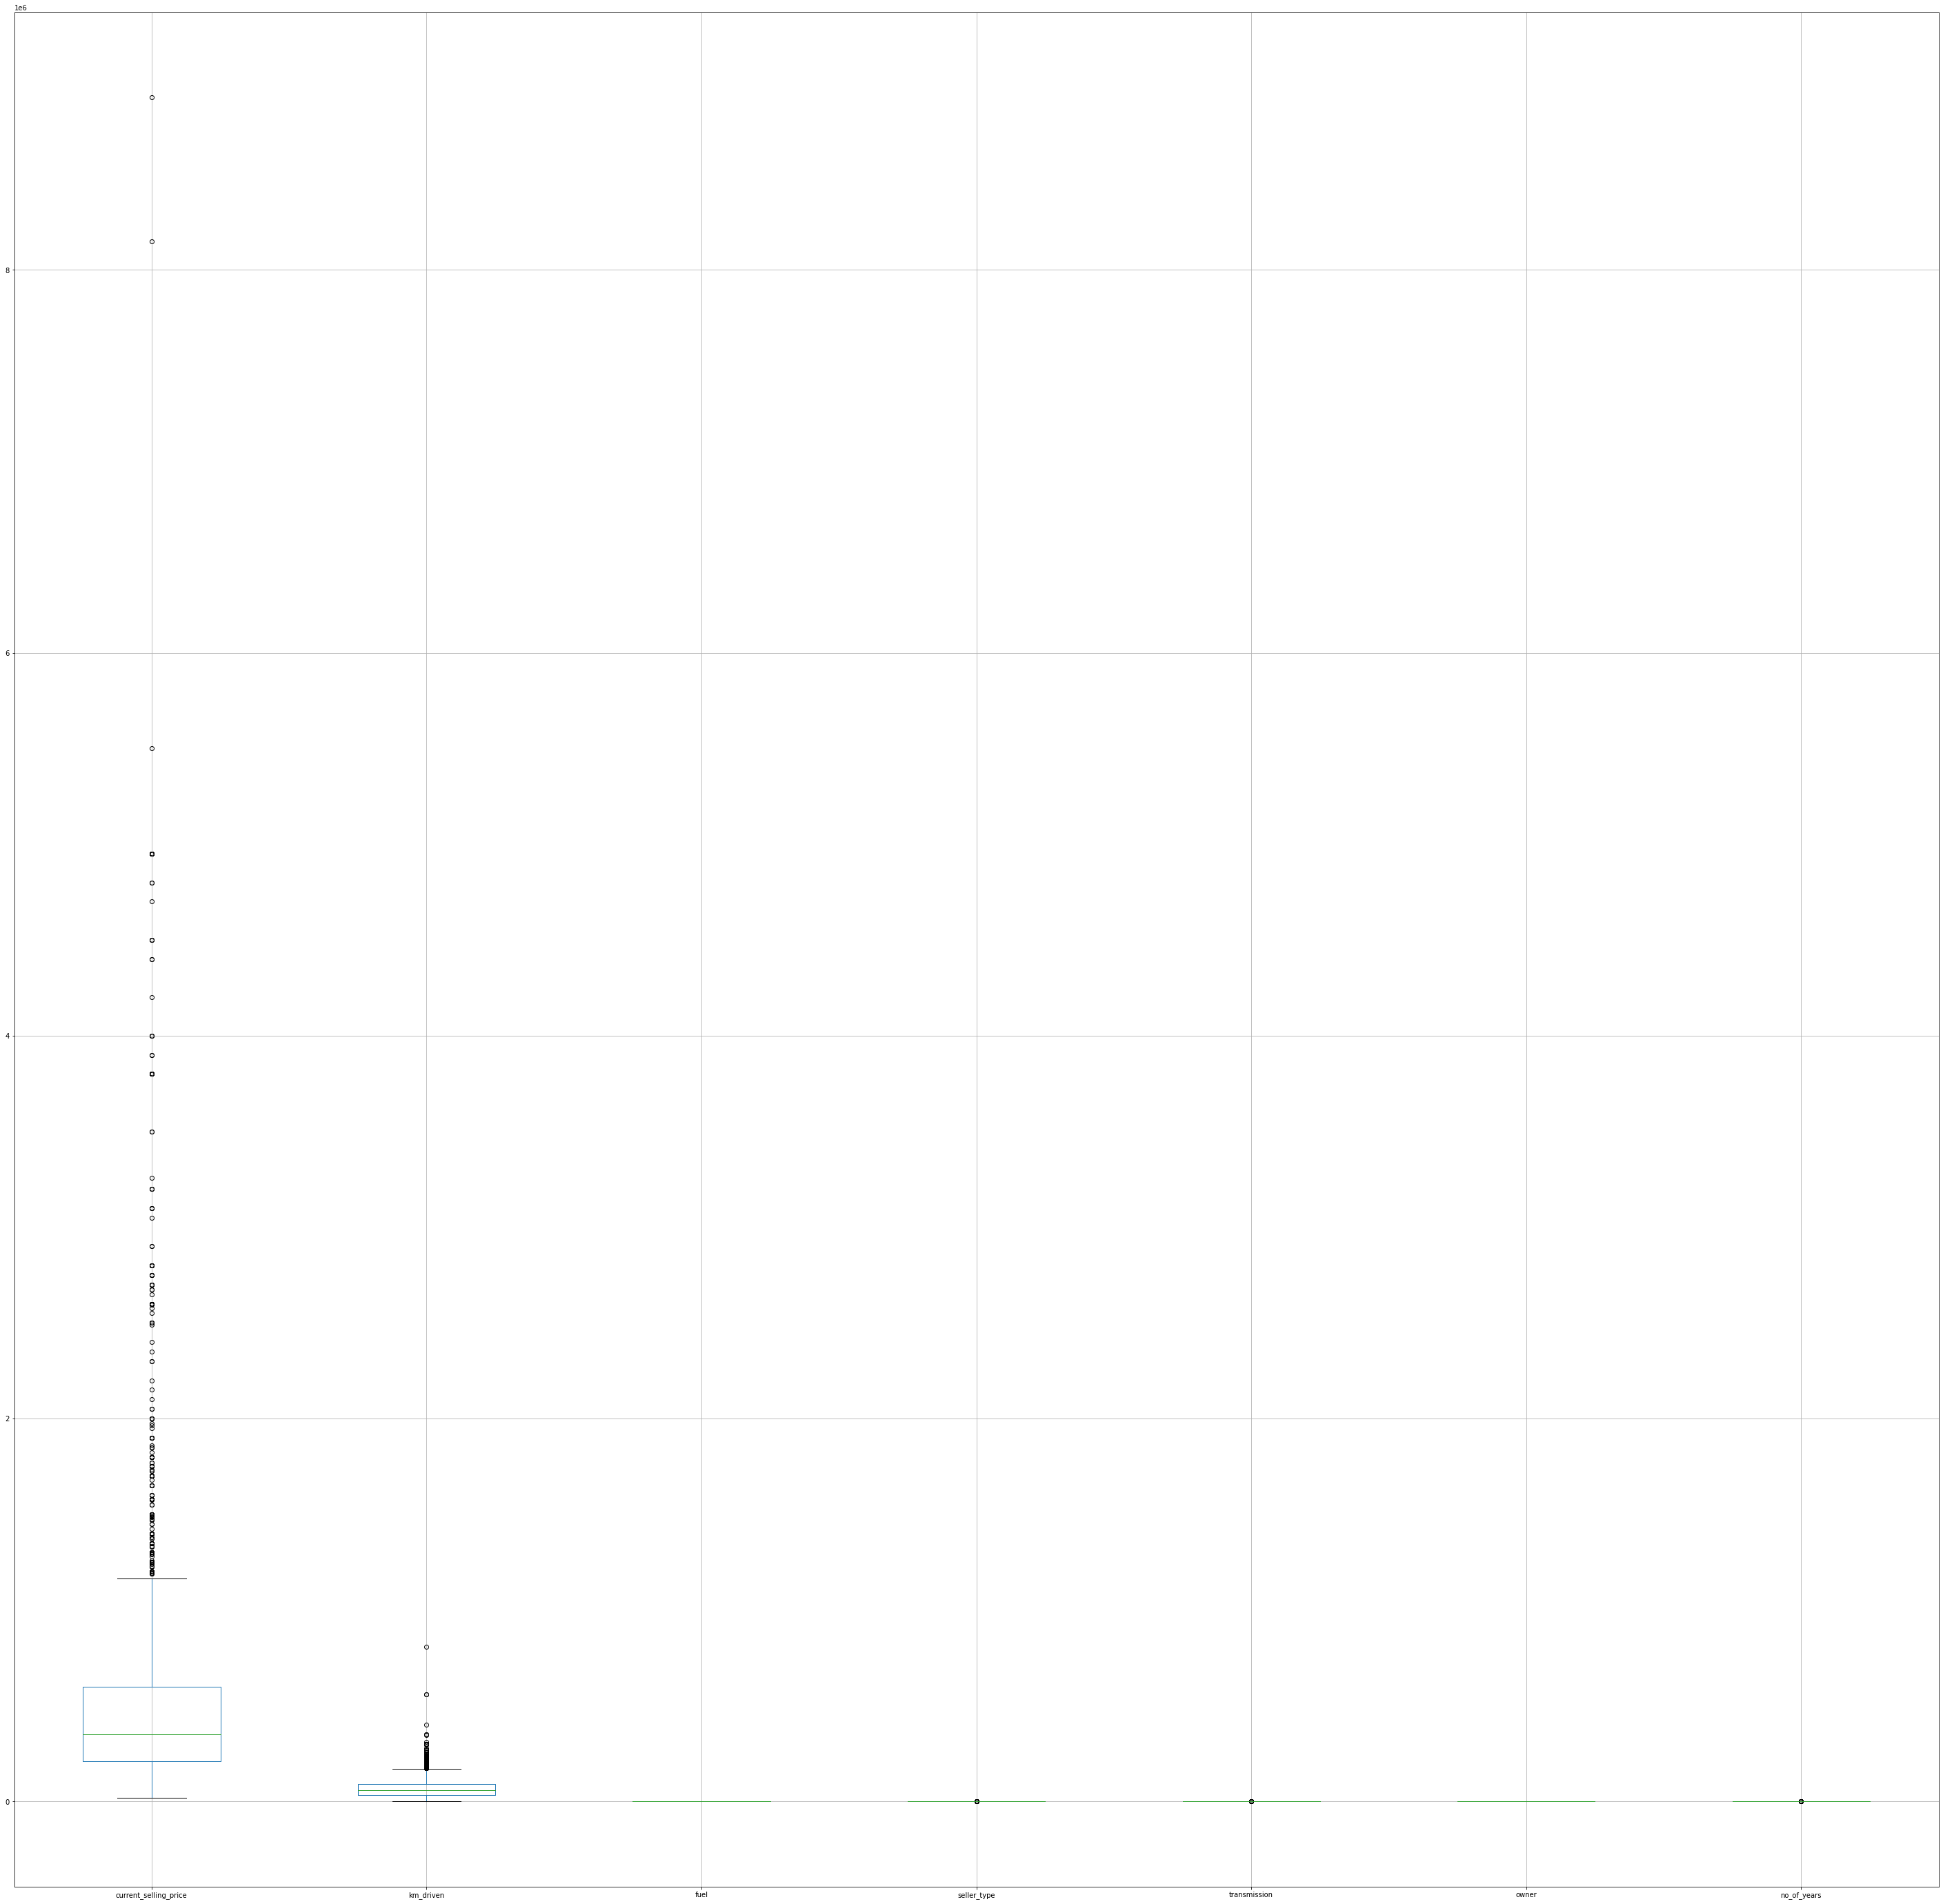

In [82]:
plt.figure(figsize=(50,50))
df.boxplot()

# Select the features and targets

In [86]:
X = np.array(df.drop('current_selling_price',axis=1))
y = np.array(df.current_selling_price)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [91]:
len(y_train)

3472

# Choosing the model

In [92]:
regressor = DecisionTreeRegressor()

# Training the model

In [93]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [97]:
y_pred = regressor.predict(X_test)

# Testing the model

In [105]:
target = pd.DataFrame({"Actual":y_test.reshape(-1), "Predicted":y_pred.reshape(-1)})

In [109]:
target.head()

,Actual,Predicted
0,840000,840000.0
1,198000,260000.0
2,470000,400000.0
3,535000,535000.0
4,320000,385000.0


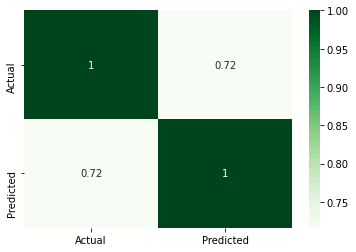

In [110]:
sns.heatmap(target.corr(), annot=True, cmap='Greens')

# Performance


In [111]:
r2_score(y_test,y_pred)

0.45707128108681194

# # Therefore, the r2_score of our model using Decision Treee is 45%

__________________________________________________________________________________________________________________________________________

# Random Forest Regressor Project

Decision Tree - 45% -50%

RFR - 92% - 93%

Link: https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/cardekho_data.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Importing the dataset

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/cardekho_data.csv')

In [23]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data Analysis(EDA, DE, DM, DC, DV)

In [24]:
df.shape

(301, 9)

In [25]:
print("Fuel Type",df.Fuel_Type.unique())
print("Seller Type",df.Seller_Type.unique())
print("Transmission",df.Transmission.unique())
print("Owner Type",df.Owner.unique())

Fuel Type ['Petrol' 'Diesel' 'CNG']
Seller Type ['Dealer' 'Individual']
Transmission ['Manual' 'Automatic']
Owner Type [0 1 3]


In [26]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [27]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [28]:
df['current_year'] = 2021

In [29]:
df['no. of year'] = df['current_year'] - df['Year']

In [30]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,no. of year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [32]:
df.drop(['Car_Name', 'Year', 'current_year'],axis=1, inplace=True)

In [33]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no. of year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [36]:
df = pd.get_dummies(df)

In [37]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no. of year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,7,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,8,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,4,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,10,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,7,0,1,0,1,0,0,1


In [39]:
df.drop(['Fuel_Type_CNG', 'Seller_Type_Dealer', 'Transmission_Automatic'],axis=1, inplace=True)

In [40]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no. of year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [42]:
df.shape

(301, 9)

In [43]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no. of year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no. of year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


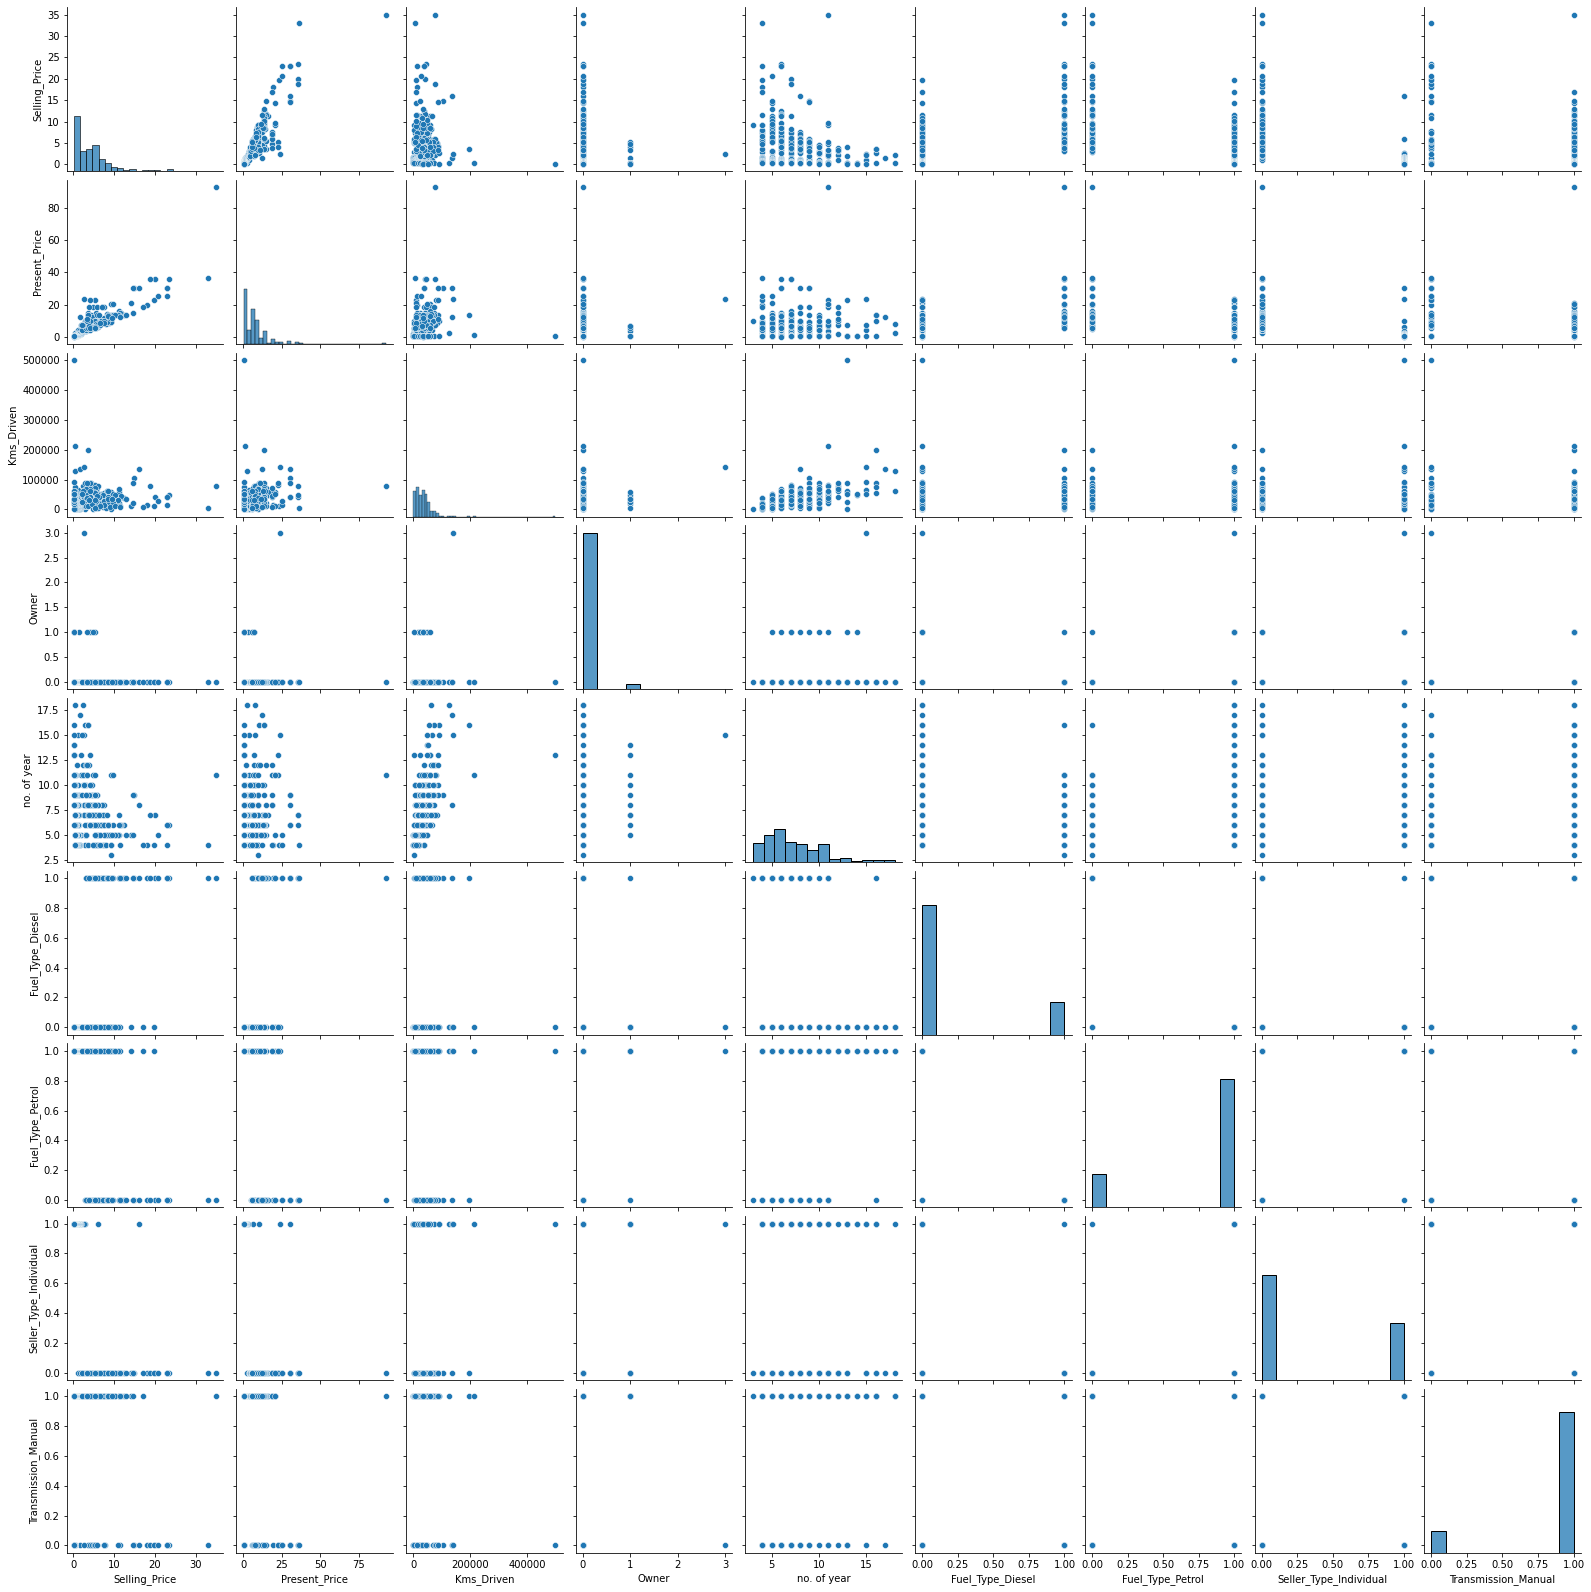

In [44]:
sns.pairplot(df)

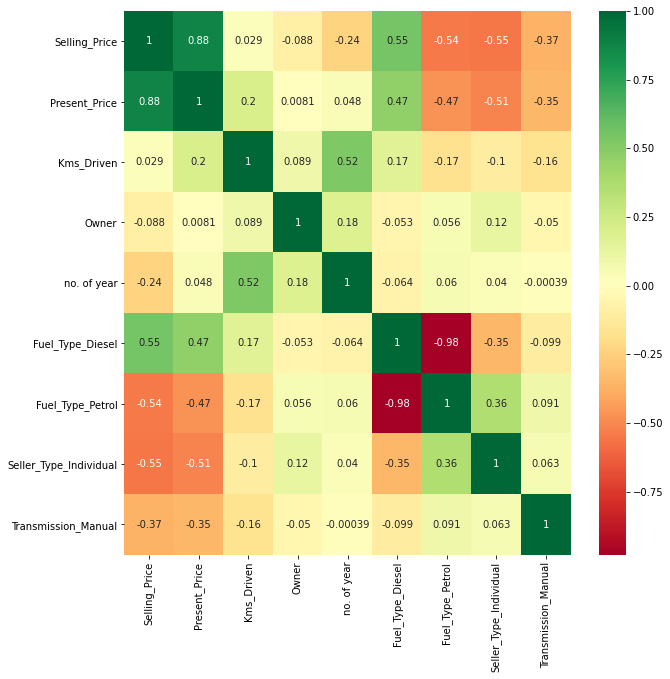

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

In [56]:
# X = np.array(df.drop('Selling_Price'))
# X = np.array(df.iloc[:,1:])
# y = np.array(df.iloc[:,0])
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [57]:
X

,Present_Price,Kms_Driven,Owner,no. of year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1
...,...,...,...,...,...,...,...,...
296,11.60,33988,0,5,1,0,0,1
297,5.90,60000,0,6,0,1,0,1
298,11.00,87934,0,12,0,1,0,1
299,12.50,9000,0,4,1,0,0,1


In [51]:
y

array([ 3.35,  4.75,  7.25,  2.85,  4.6 ,  9.25,  6.75,  6.5 ,  8.75,
        7.45,  2.85,  6.85,  7.5 ,  6.1 ,  2.25,  7.75,  7.25,  7.75,
        3.25,  2.65,  2.85,  4.9 ,  4.4 ,  2.5 ,  2.9 ,  3.  ,  4.15,
        6.  ,  1.95,  7.45,  3.1 ,  2.35,  4.95,  6.  ,  5.5 ,  2.95,
        4.65,  0.35,  3.  ,  2.25,  5.85,  2.55,  1.95,  5.5 ,  1.25,
        7.5 ,  2.65,  1.05,  5.8 ,  7.75, 14.9 , 23.  , 18.  , 16.  ,
        2.75,  3.6 ,  4.5 ,  4.75,  4.1 , 19.99,  6.95,  4.5 , 18.75,
       23.5 , 33.  ,  4.75, 19.75,  9.25,  4.35, 14.25,  3.95,  4.5 ,
        7.45,  2.65,  4.9 ,  3.95,  5.5 ,  1.5 ,  5.25, 14.5 , 14.73,
        4.75, 23.  , 12.5 ,  3.49,  2.5 , 35.  ,  5.9 ,  3.45,  4.75,
        3.8 , 11.25,  3.51, 23.  ,  4.  ,  5.85, 20.75, 17.  ,  7.05,
        9.65,  1.75,  1.7 ,  1.65,  1.45,  1.35,  1.35,  1.35,  1.25,
        1.2 ,  1.2 ,  1.2 ,  1.15,  1.15,  1.15,  1.15,  1.11,  1.1 ,
        1.1 ,  1.1 ,  1.05,  1.05,  1.05,  1.05,  1.  ,  0.95,  0.9 ,
        0.9 ,  0.75,

# Feature Selection (Feature Importance)

In [52]:
from sklearn.ensemble import ExtraTreesRegressor

In [58]:
model = ExtraTreesRegressor()
feat_imp = model.fit(X,y)

In [59]:
feat_imp.feature_importances_

array([0.37559549, 0.04269043, 0.00042893, 0.07860415, 0.22899992,
       0.011506  , 0.13247218, 0.1297029 ])

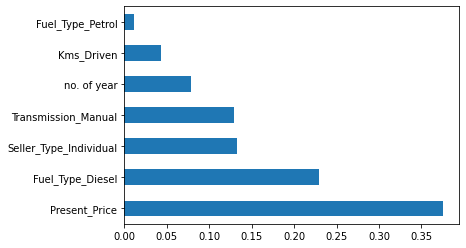

In [63]:
imp = pd.Series(feat_imp.feature_importances_, index=X.columns)
imp.nlargest(7).plot(kind='barh')

# Splitting the data

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                    random_state=0)

In [66]:
X_test

,Present_Price,Kms_Driven,Owner,no. of year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
223,9.400,61381,0,6,1,0,0,1
150,0.826,6000,0,10,0,1,1,1
226,5.700,24678,0,6,0,1,0,1
296,11.600,33988,0,5,1,0,0,1
52,19.770,15000,0,4,1,0,0,0
...,...,...,...,...,...,...,...,...
137,0.787,16000,0,8,0,1,1,1
227,4.430,57000,0,10,0,1,0,1
26,5.870,55138,0,8,0,1,0,1
106,3.450,16500,1,7,0,1,1,1


# Model Selection

In [67]:
regressor = RandomForestRegressor()

# Hyper Parameter Tuning

In [70]:
n_estimators = [int(i) for i in np.linspace(start=100, stop=1200, num=12)]

max_features = ['auto','sqrt']

max_depth = [int(i) for i in np.linspace(start=5, stop=30, num=6)]

min_samples_split = [2, 5, 10, 15, 100]

min_samples_leaf = [1, 2, 5,10]

In [71]:
random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [72]:
from sklearn.model_selection import RandomizedSearchCV

In [73]:
rf_regressor = RandomizedSearchCV(estimator=regressor,
                                  param_distributions=random_grid,
                                  scoring='neg_mean_squared_error',
                                  cv=5,
                                  verbose = 2,
                                  random_state=42,
                                  n_jobs=1)

# Training the model

In [74]:
rf_regressor.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   46.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [75]:
rf_regressor.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

# Testing the model

In [76]:
y_pred = rf_regressor.predict(X_test)

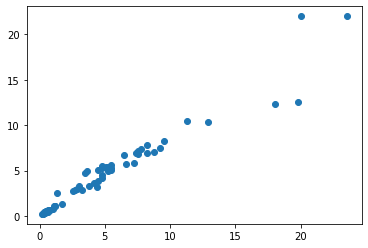

In [77]:
plt.scatter(y_test, y_pred)

In [78]:
finaldf = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})

In [79]:
finaldf

,Actual,Predicted
223,8.25,6.969402
150,0.50,0.514604
226,5.25,4.949078
296,9.50,8.317201
52,18.00,12.373524
...,...,...
137,0.65,0.407014
227,2.55,2.758696
26,4.15,3.631988
106,1.35,2.505291


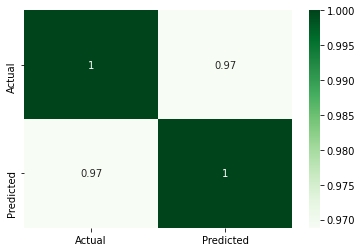

In [80]:
sns.heatmap(finaldf.corr(), annot=True, cmap='Greens')

# Performance/Accuracy

In [81]:
r2_score(y_test, y_pred)

0.9237276552854906

# Therefore, by using Random Forest Regresser got r2_score as 92% which is very better than Decision Tress Regressor.